In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [614]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams["figure.figsize"] = (15, 6)

from AugmentedNet.score_parser import parseScore
from AugmentedNet.input_representations import Bass19, Chromagram19, Bass35, Chromagram35, MeasureNoteOnset14
from AugmentedNet.feature_representation import SPELLINGS

In [695]:
def _plot_array_19(arr, filename="tmp.png"):
    arr[:, :7] += 8
    # this +8 is just moving the color chosen for the generic note letter encoding
    # currently, in the "Paired" cmap with 6 pairs of colors, the pairs 0,1 and 8,9 result in blue/purple, which look pretty nice

    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="Paired", vmin=0, vmax=11)
    # The vmin and vmax are necessary because cmap normalizes the values to [0, 1] before applying colors, in Paired cmaps like "Paired" or "tab20"
    # in order for two colors to be chosen next to each other, the algorithm needs to normalize using all the color options available
    # in short, vmin=0 and vmax should be set to the maximum number of colors supported by the cmap; 19 for "tab20", and "11" for "Paired"
    labels = ["C", "D", "E", "F", "G", "A", "B"] + list(range(12))
    step = 4
    spacinga = " " * 2
    spacingb = " " * 12
    spacingc = " " * 11
    plt.yticks(ticks=[x + 0.5 for x in range(arr.shape[1])], labels=labels, fontsize="large", fontweight="bold")
    plt.xticks([x + 0.5 for x in range(0, arr.shape[0], step)], labels=range(0, arr.shape[0], step), fontsize="large", fontweight="bold")
    plt.xlabel(f"Timestep (thirty-second notes)", fontsize="xx-large", fontweight="bold")
    plt.ylabel(f"{spacinga}Note letter{spacingb}Pitch-class{spacingc}", fontsize="xx-large", fontweight="bold", verticalalignment="bottom")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def _plot_array_35(arr, filename="tmp.png"):
    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="Paired", vmin=0, vmax=11)
    # The vmin and vmax are necessary because cmap normalizes the values to [0, 1] before applying colors, in Paired cmaps like "Paired" or "tab20"
    # in order for two colors to be chosen next to each other, the algorithm needs to normalize using all the color options available
    # in short, vmin=0 and vmax should be set to the maximum number of colors supported by the cmap; 19 for "tab20", and "11" for "Paired"
    labels = ["{:<3}".format(x.replace("-", "b").replace("##", "x")) for x in SPELLINGS]
    step = 4
    plt.yticks(ticks=[x + 0.5 for x in range(arr.shape[1])], labels=labels, fontfamily="monospace", fontweight="bold")
    plt.xticks([x + 0.5 for x in range(0, arr.shape[0], step)], labels=range(0, arr.shape[0], step), fontsize="large", fontweight="bold")
    plt.xlabel(f"Timestep (thirty-second notes)", fontsize="xx-large", fontweight="bold")
    plt.ylabel(f"Pitch spelling", fontsize="xx-large", fontweight="bold")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def _plot_array_14(arr, filename="tmp.png"):
    arr[:, :7] += 8
    # this +8 is just moving the color chosen for the generic note letter encoding
    # currently, in the "Paired" cmap with 6 pairs of colors, the pairs 0,1 and 8,9 result in blue/purple, which look pretty nice

    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="Paired", vmin=0, vmax=11)
    # The vmin and vmax are necessary because cmap normalizes the values to [0, 1] before applying colors, in Paired cmaps like "Paired" or "tab20"
    # in order for two colors to be chosen next to each other, the algorithm needs to normalize using all the color options available
    # in short, vmin=0 and vmax should be set to the maximum number of colors supported by the cmap; 19 for "tab20", and "11" for "Paired"
    labels = ["onset", "¹⁄₃₂", "¹⁄₁₆", "⅛", "¼", "½", "1"] * 2
    step = 4
    spacingcenter = " " * 18
    spacingend = " " * 7
    plt.yticks(ticks=[x + 0.5 for x in range(arr.shape[1])], labels=labels, fontweight="bold", fontsize="x-large")
    plt.xticks([x + 0.5 for x in range(0, arr.shape[0], step)], labels=range(0, arr.shape[0], step), fontsize="large", fontweight="bold")
    plt.xlabel(f"Timestep (thirty-second notes)", fontsize="xx-large", fontweight="bold")
    plt.ylabel(f"Measure{spacingcenter}Note{spacingend}", fontsize="xx-large", fontweight="bold", verticalalignment="bottom")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()




# # font = {'family': 'sans', 'size': 14, "weight": "bold"}
# plt.rcParams["figure.figsize"] = (15, 6)
# # plt.rc('font', **font)
# # sns.barplot(x="rn", y="counts", dodge=False, hue="inversion", palette="rocket", saturation=0.7, data=rnsinvdf)
# g = sns.barplot(x="rn", y="counts", dodge=True, hue="inversion", palette="colorblind", data=rnsinvdf)
# h,l = g.get_legend_handles_labels()
# plt.legend(h[:4], l[:4], loc="upper right", fontsize="large", framealpha=0.25, title="Inversion", title_fontproperties={"weight": "bold"})
# plt.xlabel(f"Roman Numerals in the {fdataset[dataset]} Dataset", fontsize="xx-large", fontweight="bold")
# plt.xticks(rotation=45, fontfamily="monospace", fontsize="x-large", fontweight="bold")
# plt.ylabel("Total counts (log scale)", fontsize="xx-large", fontweight="bold")
# plt.yscale("log")
# plt.yticks(fontsize="x-large")
# plt.tight_layout()
# plt.savefig(f"{fdataset[dataset].lower()}_rn_inversion.png")

In [688]:
score = "claraschumann-simple.mxl"
df = parseScore(score)
df = df.iloc[:100]

In [689]:
bass19 = Bass19(df)
bass35 = Bass35(df)
chroma19 = Chromagram19(df)
chroma35 = Chromagram35(df)
duration14 = MeasureNoteOnset14(df)

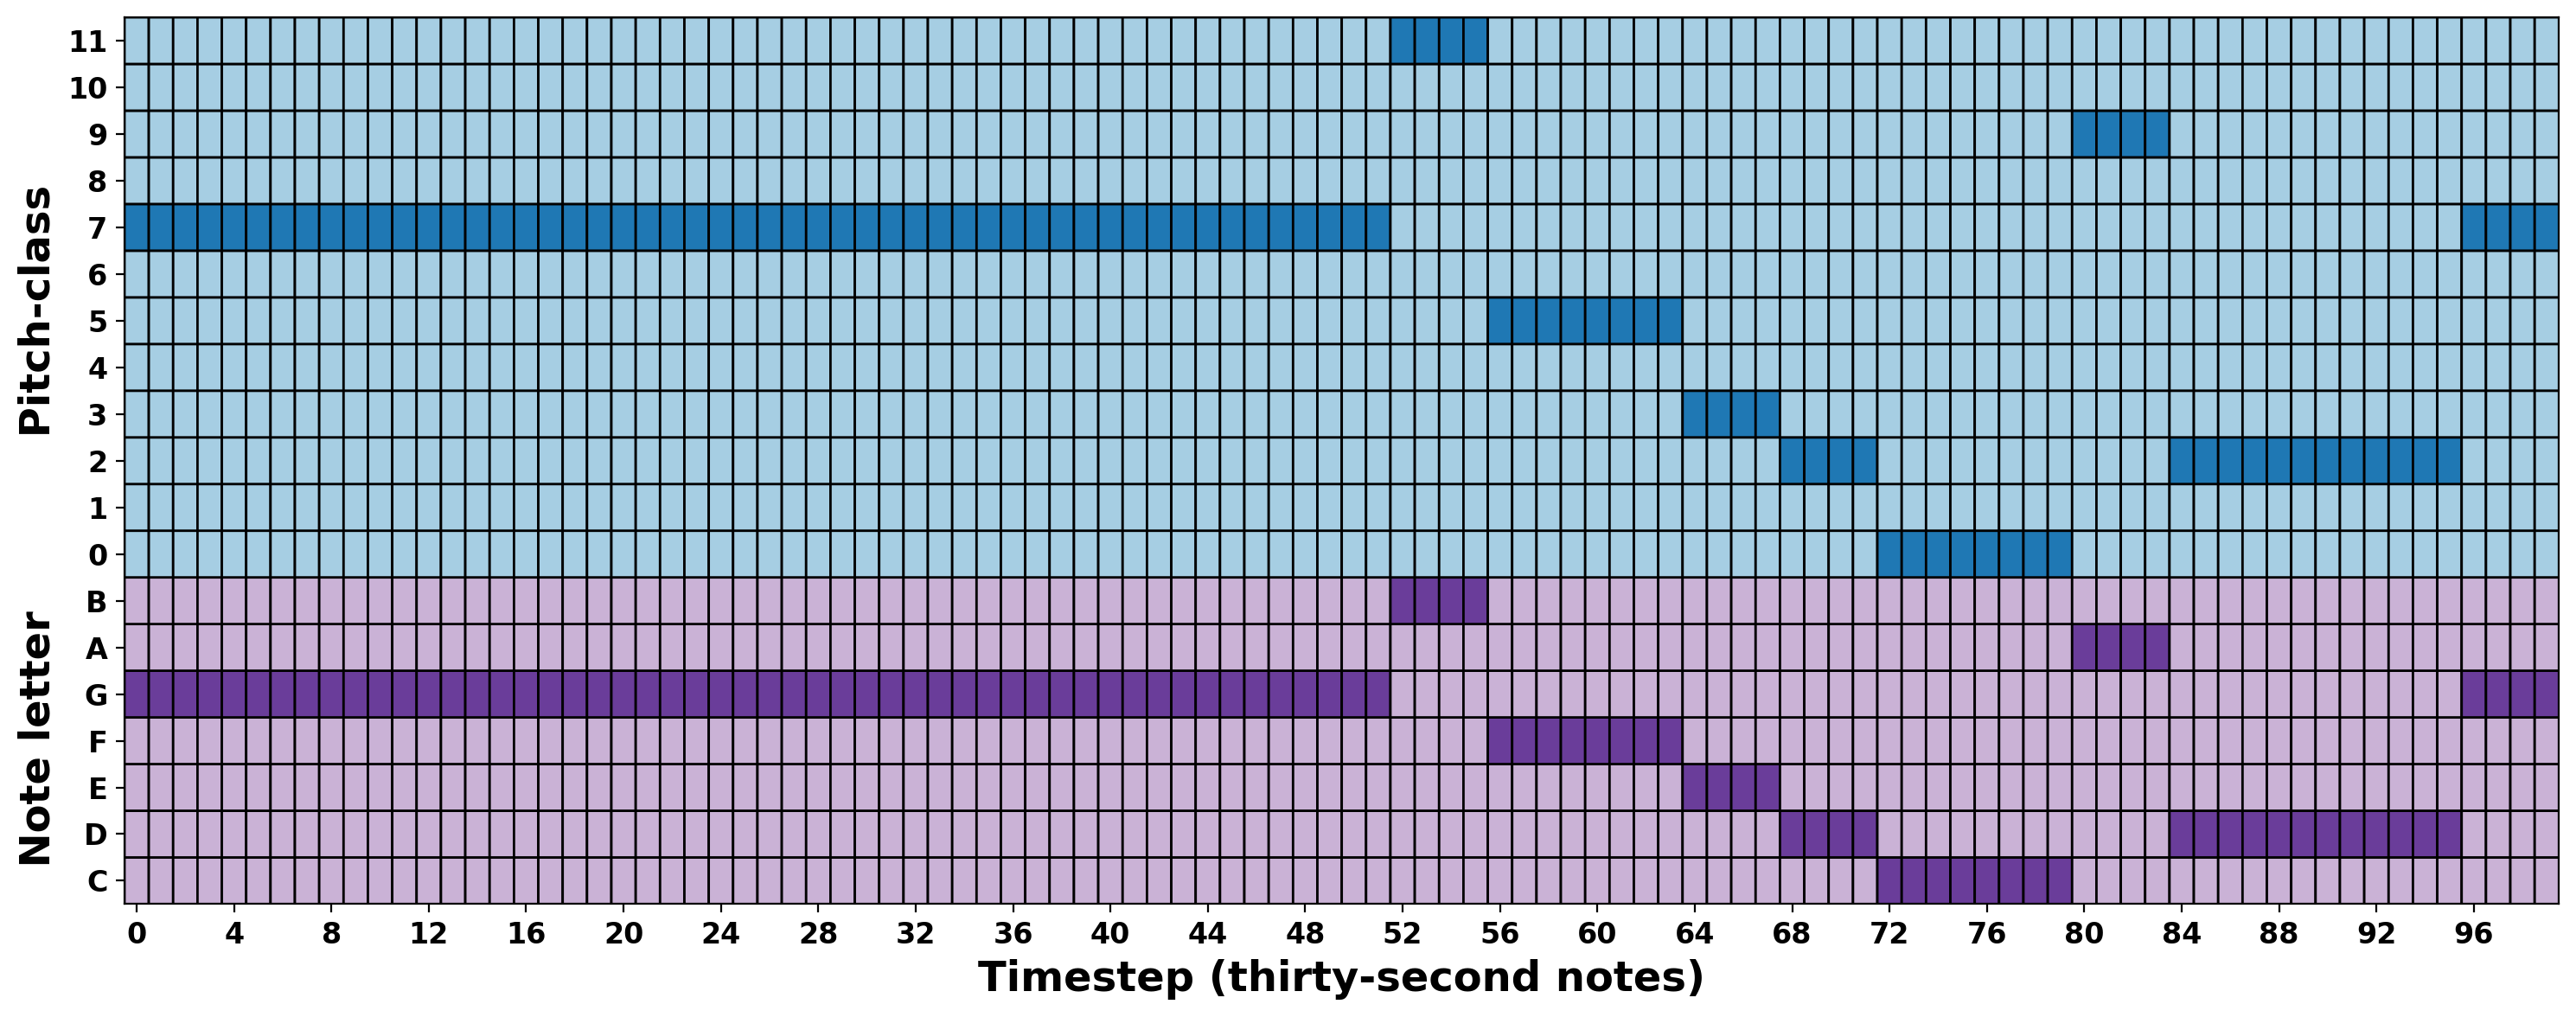

In [690]:
_plot_array_19(bass19.array, "bass_encoding.png")

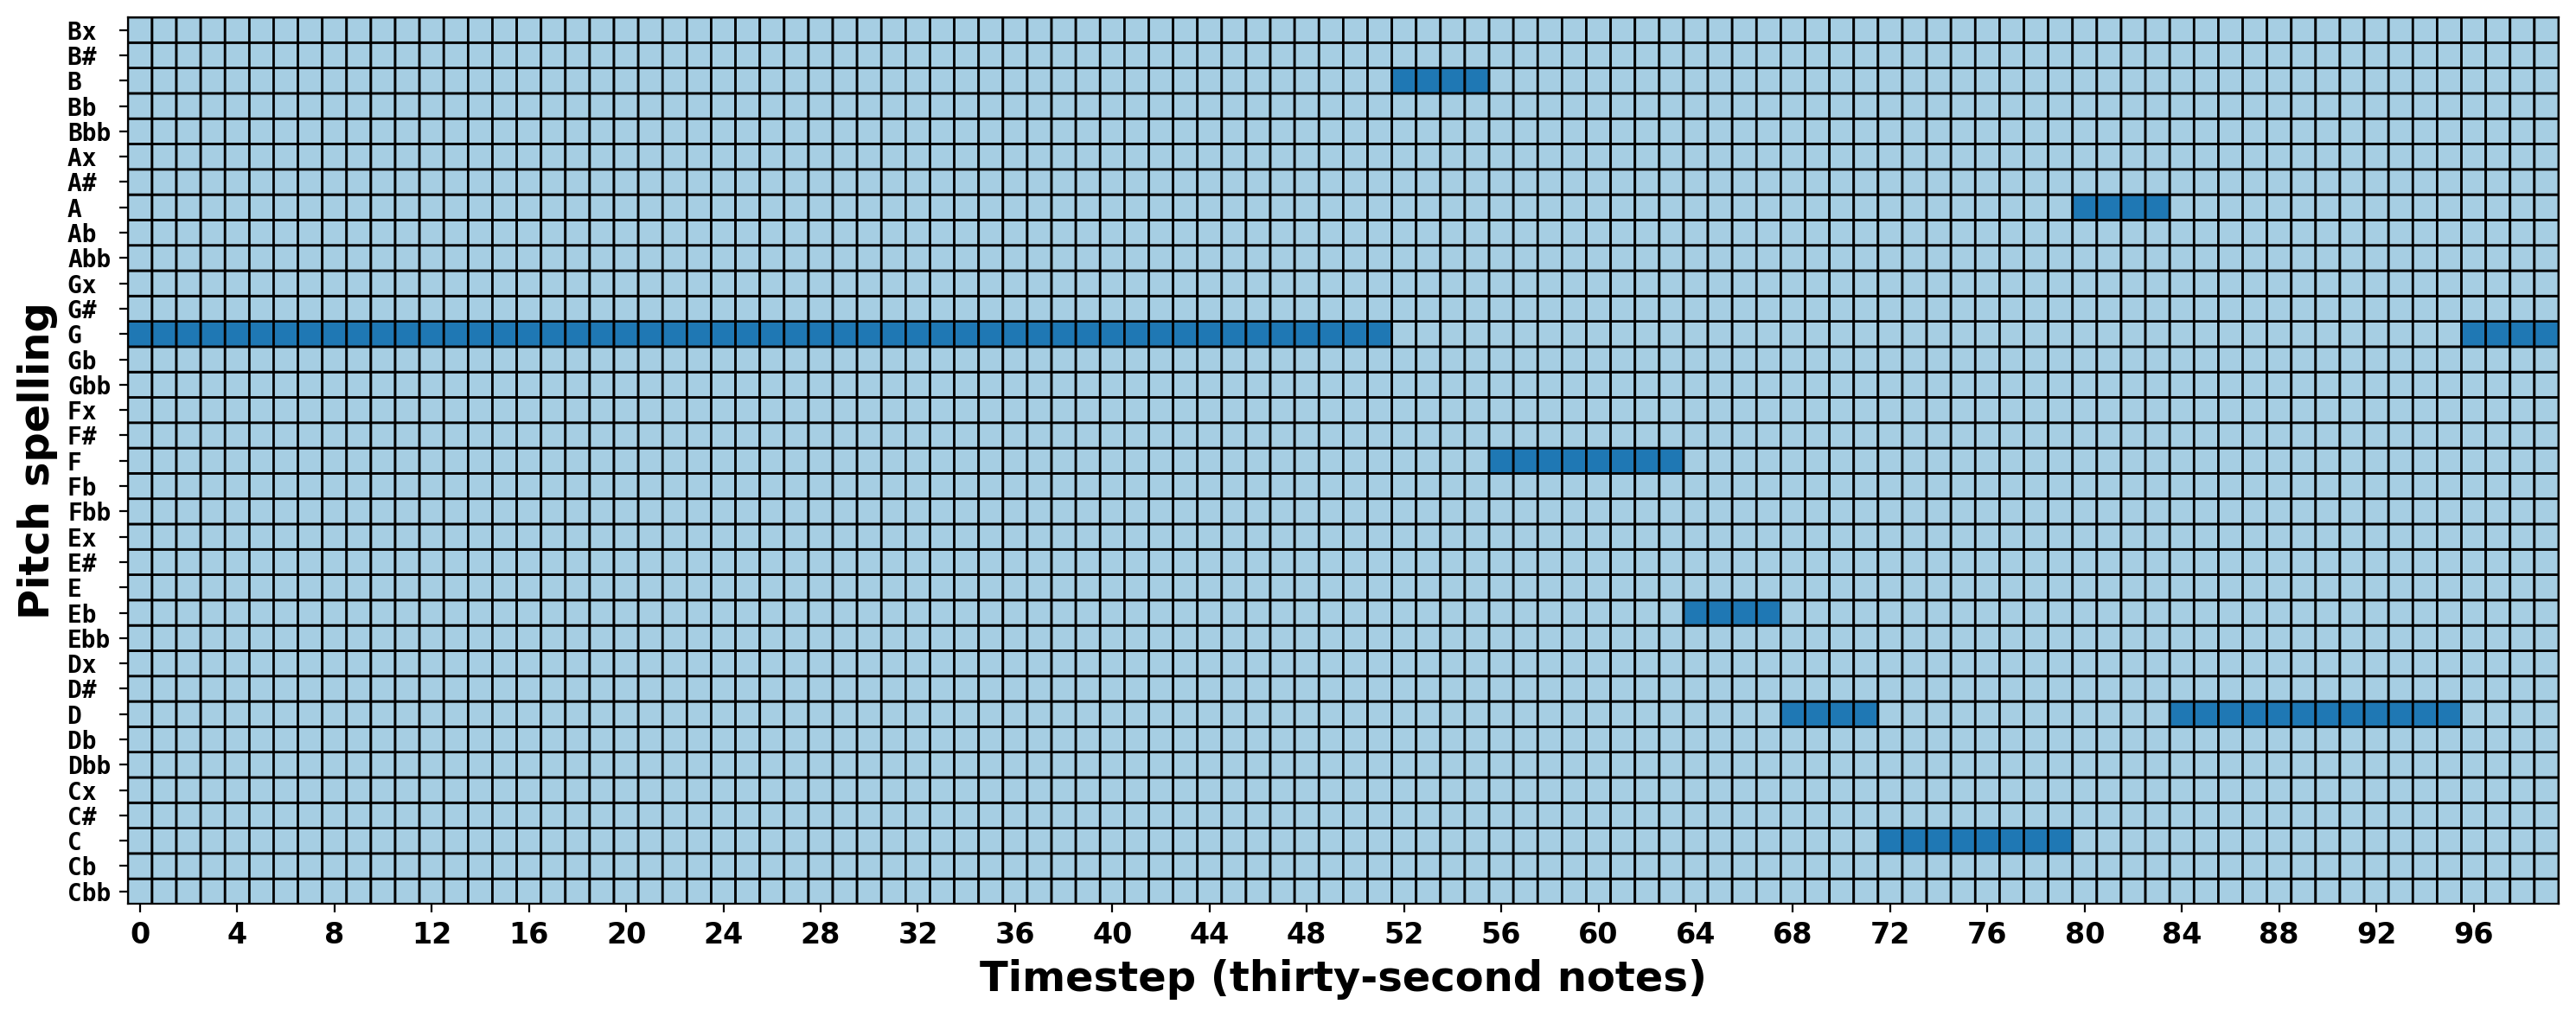

In [691]:
_plot_array_35(bass35.array, "bass_encoding35.png")

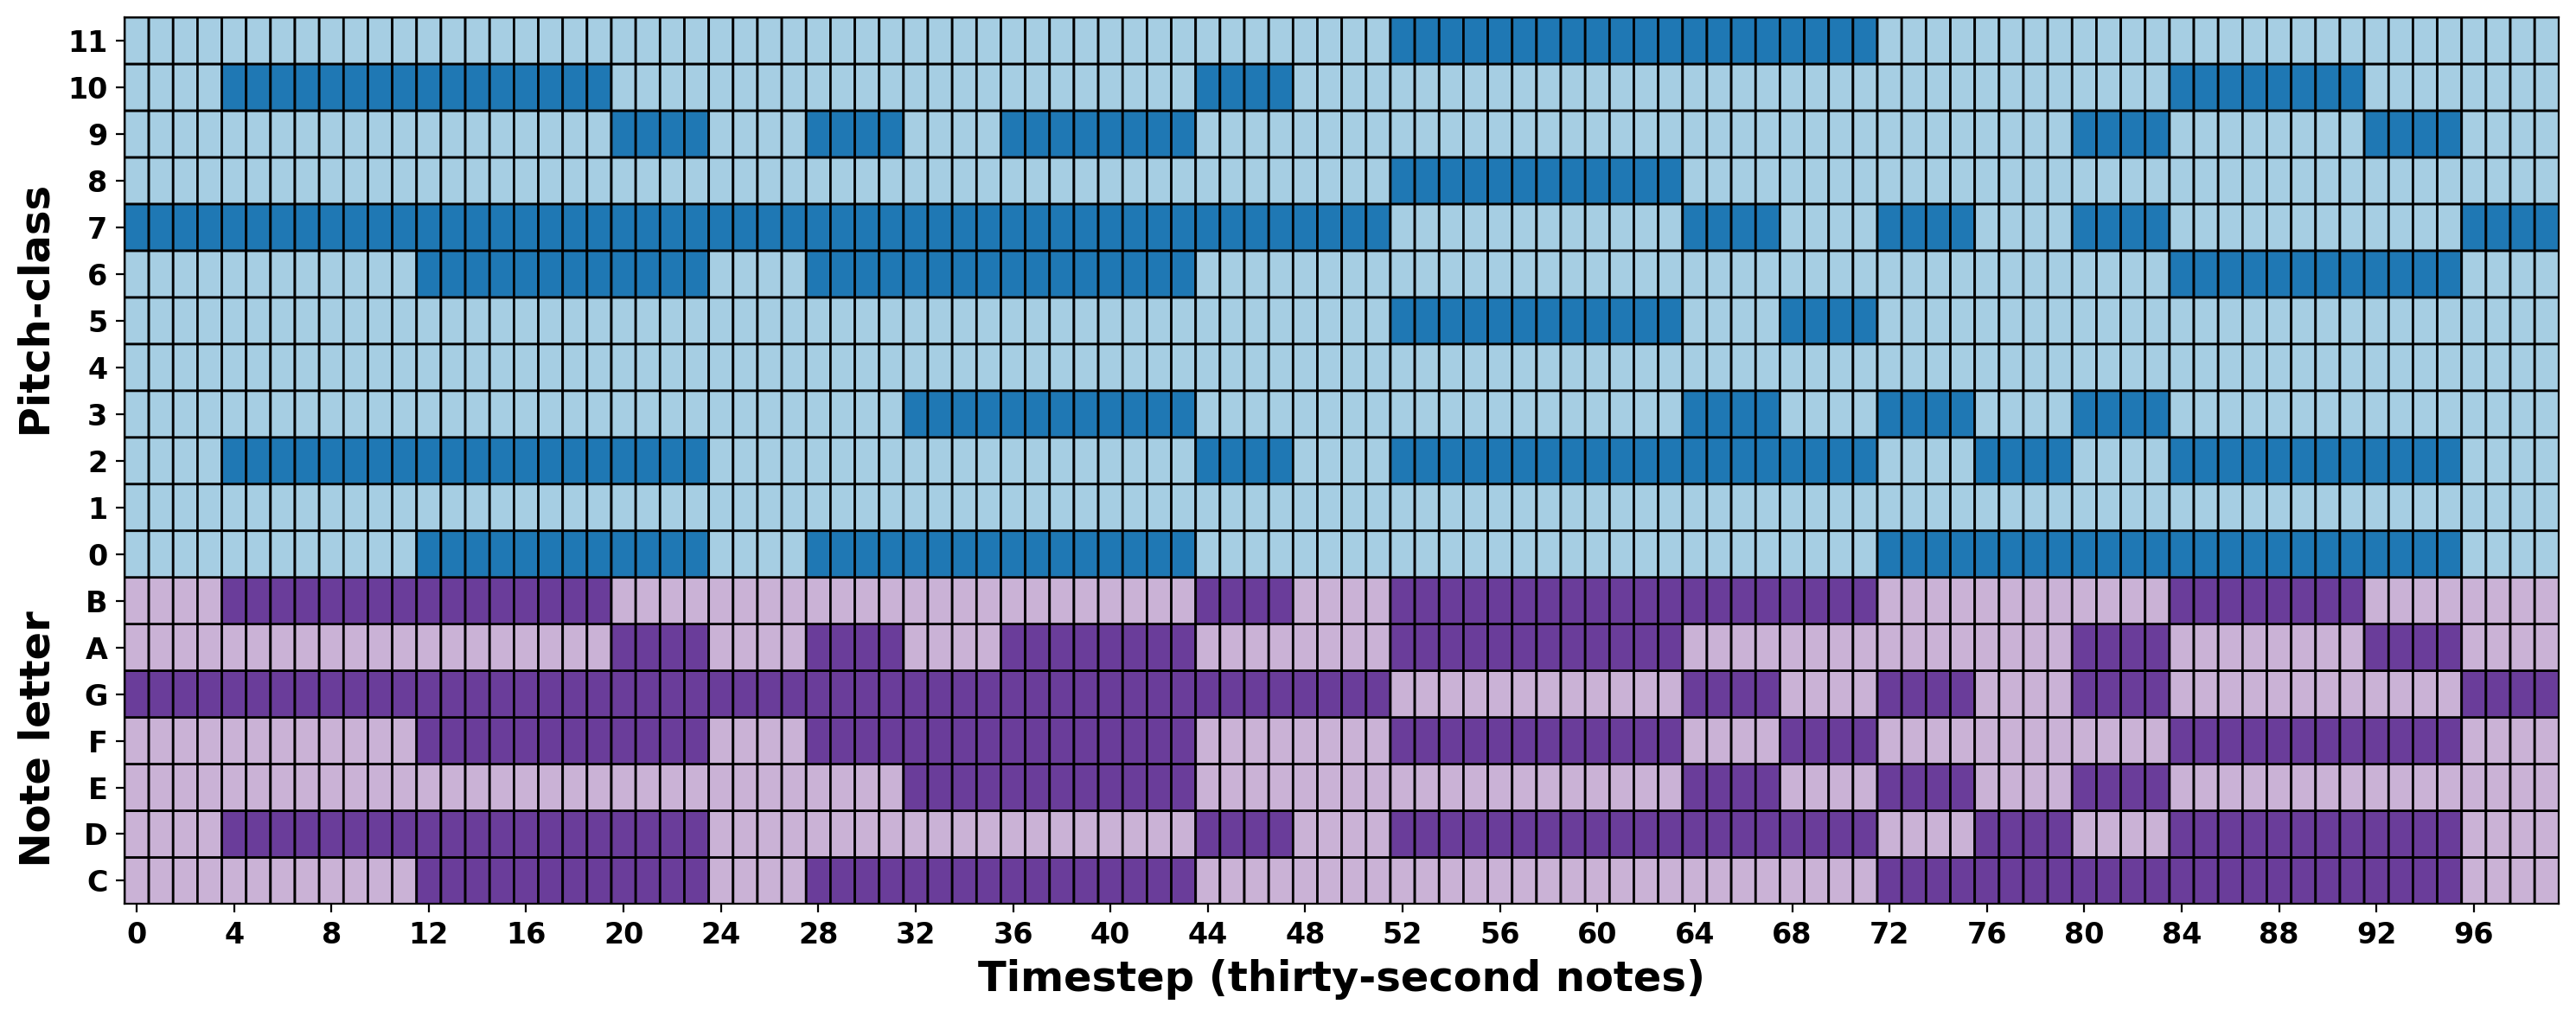

In [692]:
_plot_array_19(chroma19.array, "chroma_encoding.png")

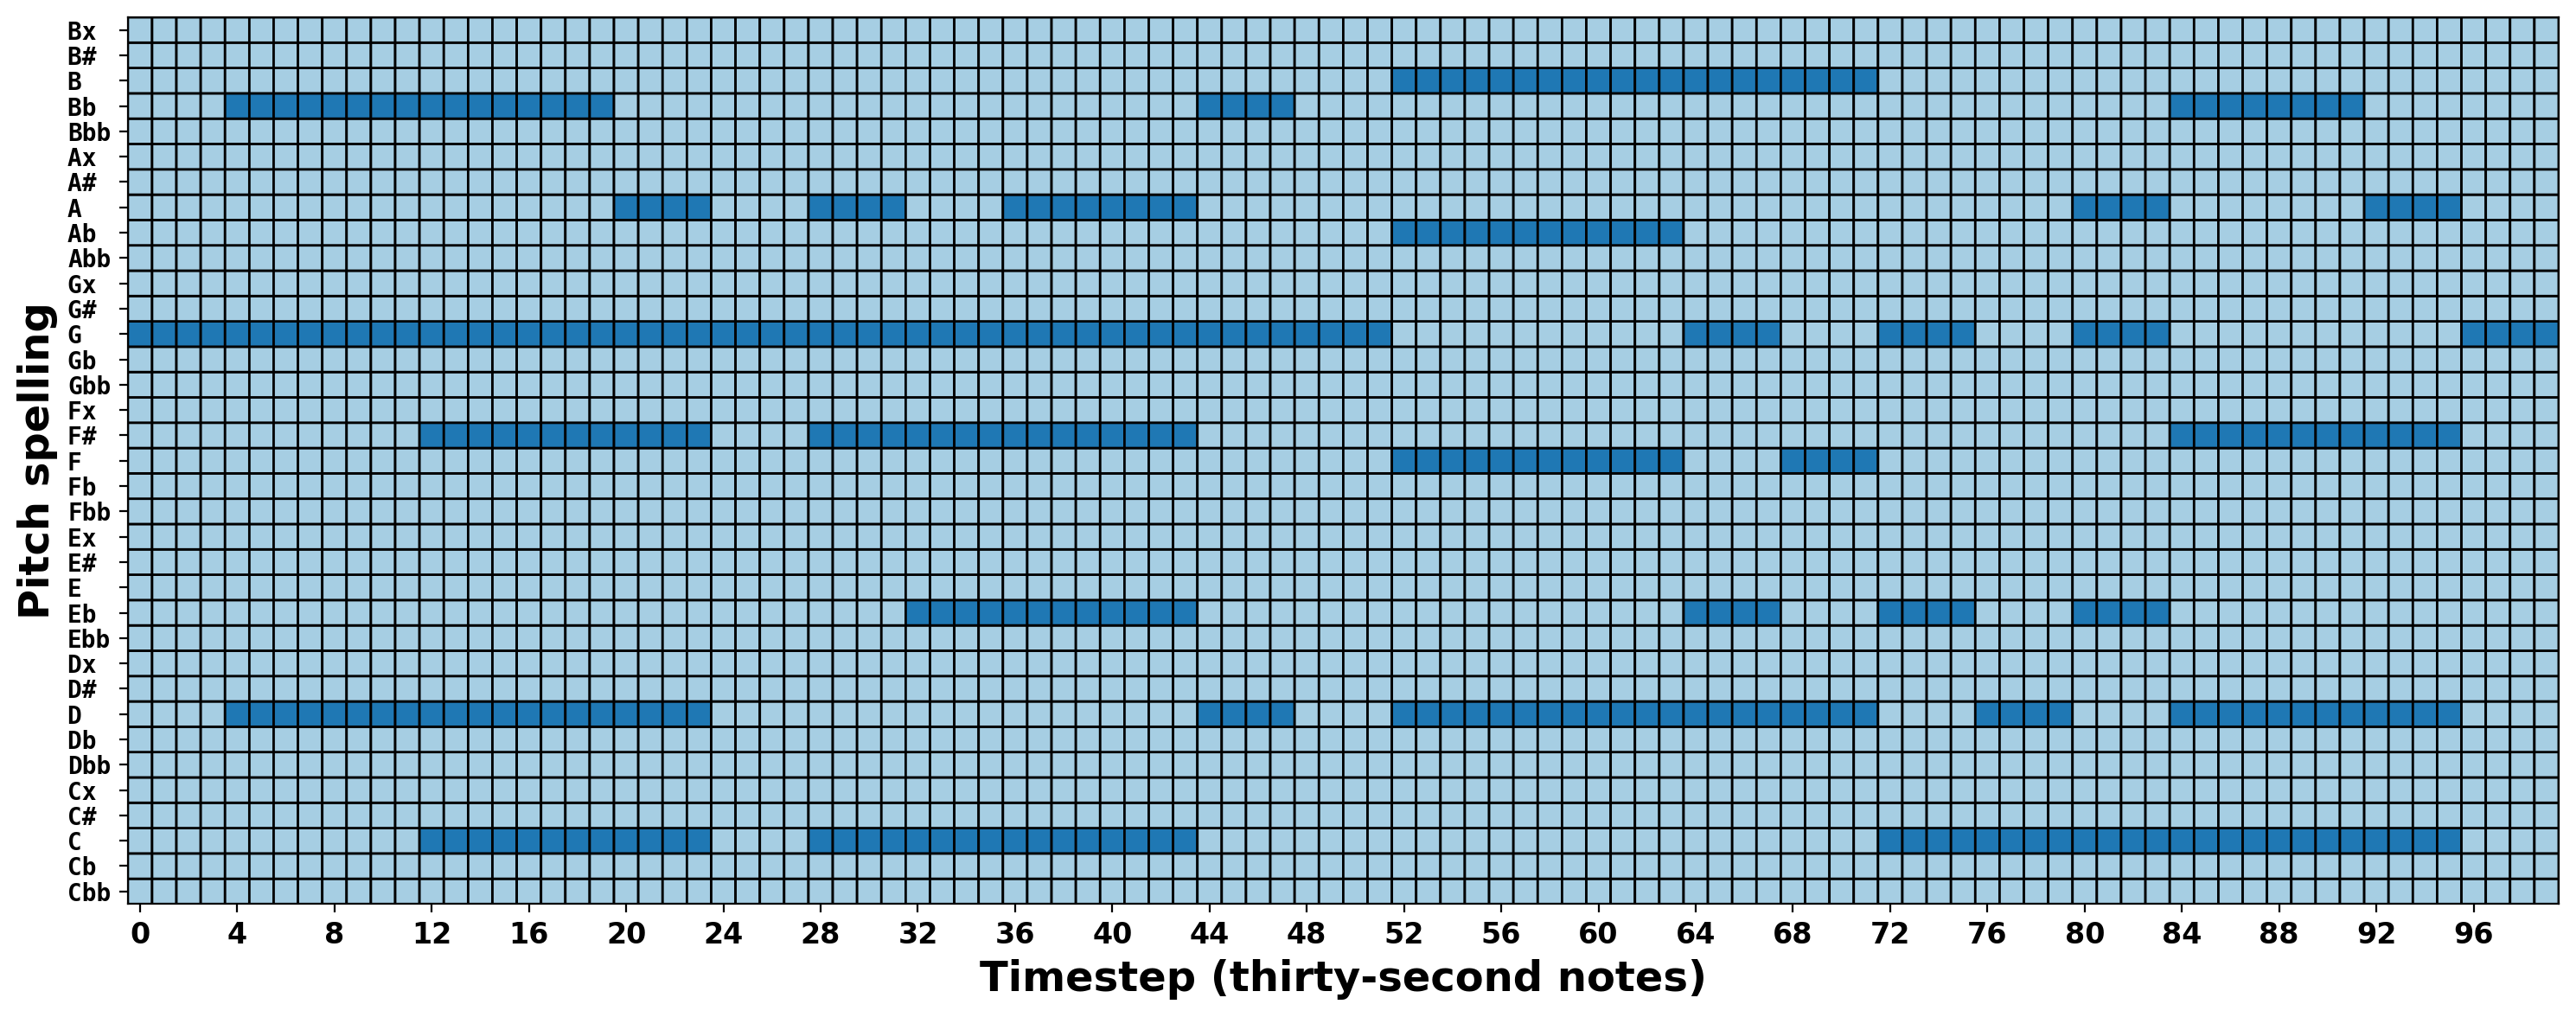

In [693]:
_plot_array_35(chroma35.array, "chroma_encoding35.png")

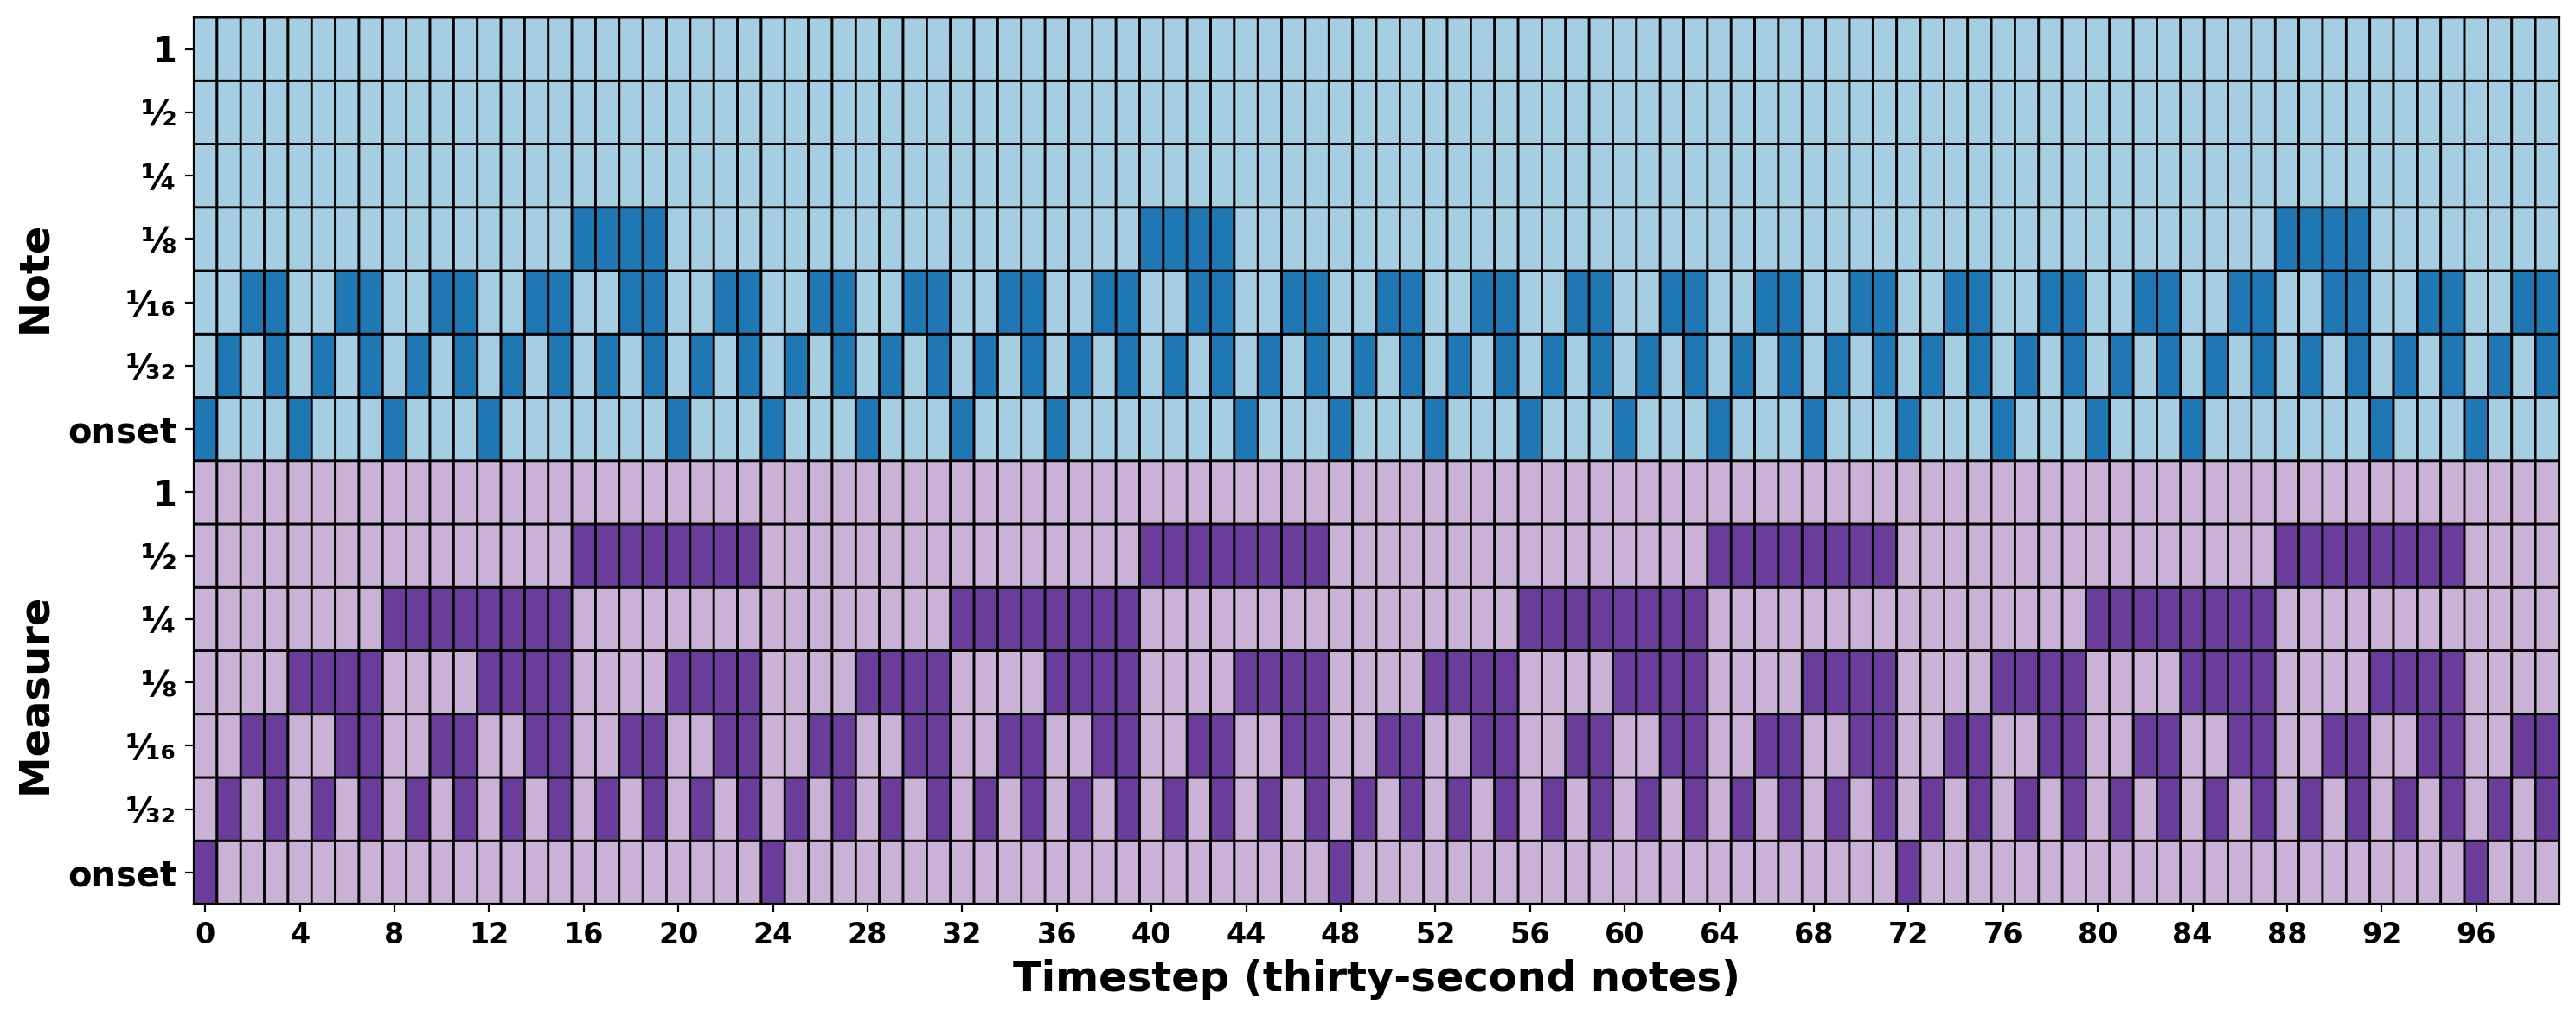

In [694]:
_plot_array_14(duration14.array, "onset_encoding.png")